# ORIE 4580/5580/5581 Assignment 4

#### Students: Xiaoyang Lyu (xl2265) and Minjia Tang (mt896)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

Let the train arrive deterministically every $10$ minutes. For any passenger with arrival time $T_i$, we can write
$$
T_i = 10q + r, \quad q \in \mathbb{Z}, \; r \in [0,10).
$$
Here $r$ is the remainder (minutes within the interval).
The waiting time until the next train is
$W_i = 10 - r.$
Since $T_i$ is uniformly distributed, $r \sim \text{Uniform}(0,10).$

Therefore, the waiting time also follows a uniform distribution:
$$
W \sim \text{Uniform}(0,10).
$$
Expected Waiting Time:
$
\mathbb{E}[W] = \frac{0+10}{2} = 5 \ \text{minutes}.
$

Variance and Standard Deviation:
$
\mathrm{Var}(W) = \frac{(10-0)^2}{12} = \frac{100}{12} \approx 8.33, \quad \sigma \approx 2.89.
$

Standard Error of the Sample Mean (with $n=10000$ passengers):
$
SE = \frac{\sigma}{\sqrt{10000}} = \frac{2.89}{100} \approx 0.029.
$

95\% Confidence Interval:
$
\mathbb{E}[W] \pm 1.96 \times SE = 5 \pm 1.96 \times 0.029.
$
$
\approx (4.94, \ 5.06).
$

The expected waiting time for a randomly chosen passenger is $5$ minutes, with a 95\% confidence interval of $(4.94, \ 5.06)$.


In [22]:
import numpy as np

rng = np.random.default_rng(42)
n_passengers = 10_000
passengers = np.sort(rng.uniform(0, 1000, size=n_passengers))

def mean_ci95(x):
    m = np.mean(x)
    s = np.std(x, ddof=1)
    se = s / np.sqrt(len(x))
    return m, (m - 1.96*se, m + 1.96*se)

next_train_a = np.ceil(passengers/10.0)*10.0
wait_a = next_train_a - passengers
mean_a, ci_a = mean_ci95(wait_a)

I_a = np.full_like(wait_a, 10.0)
mean_Ia, ci_Ia = mean_ci95(I_a)

print("mean waiting time:", mean_a)
print("95% CI of waiting time:", ci_a)
print("mean train interval experienced by passengers:", mean_Ia)
print("95% CI of train interval:", ci_Ia)



mean waiting time: 4.976402430665842
95% CI of waiting time: (np.float64(4.9199507878173865), np.float64(5.032854073514297))
mean train interval experienced by passengers: 10.0
95% CI of train interval: (np.float64(10.0), np.float64(10.0))


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.
For an exponential distribution, the memoryless property implies that the residual life is also exponential with the **same** mean. Hence the passenger waiting time $W$ satisfies
$$
W \sim \mathrm{Exp}(\lambda), \qquad \mathbb{E}[W] = \frac{1}{\lambda} = 10 \text{ minutes}.
$$

**Variance and standard deviation**
$$
\mathrm{Var}(W) = \frac{1}{\lambda^2} = 100, \qquad \sigma = 10.
$$

**Standard error of the sample mean (with $n=10{,}000$ passengers)**
$$
\mathrm{SE} = \frac{\sigma}{\sqrt{n}} = \frac{10}{\sqrt{10{,}000}} = 0.1.
$$

**95% confidence interval**
$$
10 \pm 1.96 \times 0.1 ;=; (9.804,; 10.196).
$$

The expected waiting time is 10 minutes, with a 95% CI of $(9.804,, 10.196)$.


In [23]:
rng = np.random.default_rng(40)
passengers_b = np.sort(rng.uniform(0, 1000, size=n_passengers))

rate = 1/10.0
intervals = []
t = 0.0
target = passengers_b.max() + 50.0
while t < target:
    dt = rng.exponential(scale=1/rate)
    intervals.append(dt)
    t += dt
train_times_b = np.cumsum(intervals)

idx_next = np.searchsorted(train_times_b, passengers_b, side='left')
wait_b = train_times_b[idx_next] - passengers_b
mean_b, ci_b = mean_ci95(wait_b)

print("mean waiting time:", mean_b)
print("95% CI of waiting time:", ci_b)


mean waiting time: 9.876139399909933
95% CI of waiting time: (np.float64(9.708573879397235), np.float64(10.04370492042263))


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [24]:
intervals_used = np.array(intervals)
mean_interval_b, ci_interval_b = mean_ci95(intervals_used)

print("mean train inter-arrival time:", mean_interval_b)
print("95% CI of train inter-arrival time:", ci_interval_b)


mean train inter-arrival time: 10.22562030278699
95% CI of train inter-arrival time: (np.float64(8.338346935587166), np.float64(12.112893669986812))


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [25]:
I_a = np.full(n_passengers, 10.0)
mean_Ia, ci_Ia = mean_ci95(I_a)

idx_next_b = np.searchsorted(train_times_b, passengers_b, side='left')
I_b = np.array(intervals)[idx_next_b]
mean_Ib, ci_Ib = mean_ci95(I_b)

print("(a) case: mean passenger-experienced interval:", mean_Ia)
print("(a) case: 95% CI:", ci_Ia)
print("(b) case: mean passenger-experienced interval:", mean_Ib)
print("(b) case: 95% CI:", ci_Ib)


(a) case: mean passenger-experienced interval: 10.0
(a) case: 95% CI: (np.float64(10.0), np.float64(10.0))
(b) case: mean passenger-experienced interval: 19.648667266410254
(b) case: 95% CI: (np.float64(19.432543863059237), np.float64(19.86479066976127))


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

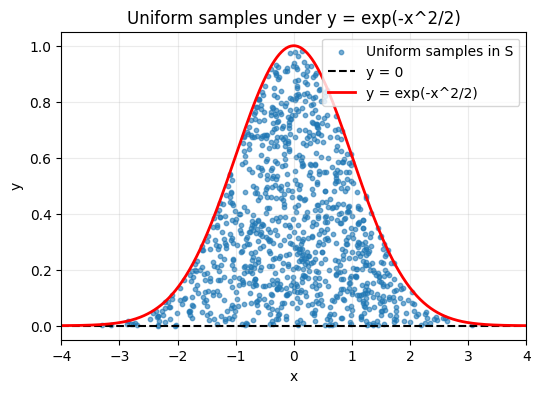

Generated 1000 uniform samples in the set S.


In [26]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)

n = 1000
X = rng.normal(0.0, 1.0, size=n)
Y = rng.uniform(0.0, 1.0, size=n) * np.exp(-0.5 * X**2)

xx = np.linspace(-4, 4, 400)
curve = np.exp(-0.5 * xx**2)

plt.figure(figsize=(6,4))
plt.scatter(X, Y, s=10, alpha=0.6, label="Uniform samples in S")
plt.plot(xx, np.zeros_like(xx), "k--", lw=1.5, label="y = 0")
plt.plot(xx, curve, "r-", lw=2, label="y = exp(-x^2/2)")
plt.xlim(-4, 4)
plt.ylim(-0.05, 1.05)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform samples under y = exp(-x^2/2)")
plt.legend()
plt.grid(True, alpha=0.25)
plt.show()

print("Generated", n, "uniform samples in the set S.")


<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

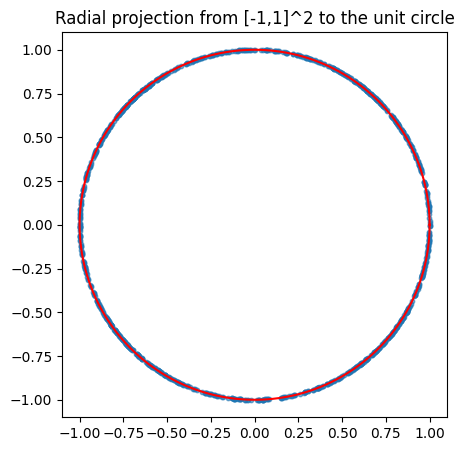

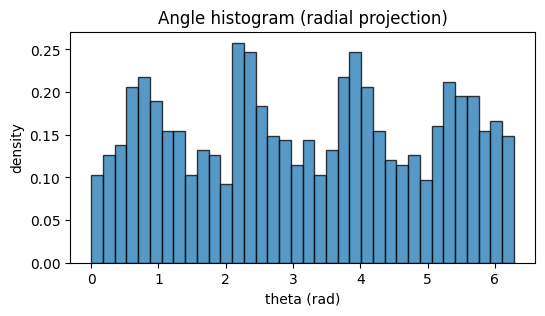

Are angles uniform on the circle? No, radial projection from a square overweights diagonal directions.


In [27]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n = 1000

U = rng.uniform(-1, 1, size=n)
V = rng.uniform(-1, 1, size=n)
r = np.sqrt(U**2 + V**2)
mask = r > 0
U, V, r = U[mask], V[mask], r[mask]
X = U / r
Y = V / r

theta = np.arctan2(Y, X)
theta = np.where(theta < 0, theta + 2*np.pi, theta)

plt.figure(figsize=(5,5))
plt.scatter(X, Y, s=10, alpha=0.6)
circle_t = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(circle_t), np.sin(circle_t), 'r-', lw=1.5)
plt.gca().set_aspect('equal')
plt.title("Radial projection from [-1,1]^2 to the unit circle")
plt.show()

plt.figure(figsize=(6,3))
plt.hist(theta, bins=36, range=(0, 2*np.pi), density=True, edgecolor='k', alpha=0.75)
plt.title("Angle histogram (radial projection)")
plt.xlabel("theta (rad)")
plt.ylabel("density")
plt.show()

print("Are angles uniform on the circle? No, radial projection from a square overweights diagonal directions.")



<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

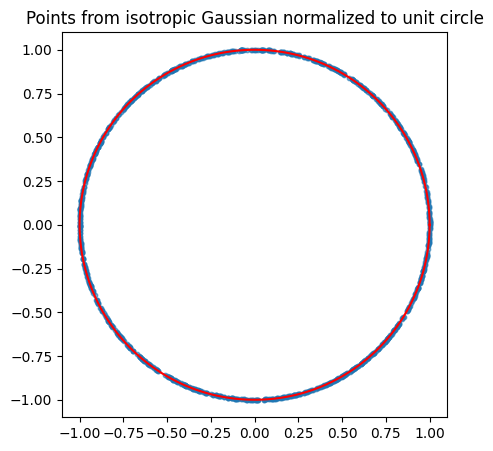

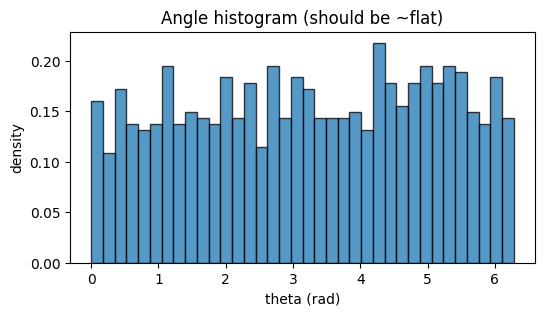

1. We generate (Z,W) from a 2D standard normal, which is rotationally invariant (isotropic).
2. In polar coordinates, the angle Theta ~ Uniform[0,2pi) and radius R is independent of Theta.
3. After normalizing (Z,W) by its radius, we get (cos Theta, sin Theta), so points lie exactly on the circle.
4. Because Theta is uniform, the points are uniformly distributed around the circle.
5. Difference from part (b): sampling from the square [-1,1]^2 is not isotropic, so projection biases certain angles.
   That method over-represents diagonal directions and under-represents axis directions.
6. Here, using Gaussian ensures perfect uniformity on the circle circumference.


In [28]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n = 1000

Z = rng.standard_normal(n)
W = rng.standard_normal(n)
r = np.sqrt(Z**2 + W**2)
X = Z / r
Y = W / r

theta = np.arctan2(Y, X)
theta = np.where(theta < 0, theta + 2*np.pi, theta)

plt.figure(figsize=(5,5))
plt.scatter(X, Y, s=10, alpha=0.6)
t = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(t), np.sin(t), 'r-', lw=1.5)
plt.gca().set_aspect('equal')
plt.title("Points from isotropic Gaussian normalized to unit circle")
plt.show()

plt.figure(figsize=(6,3))
plt.hist(theta, bins=36, range=(0, 2*np.pi), density=True, edgecolor='k', alpha=0.75)
plt.title("Angle histogram (should be ~flat)")
plt.xlabel("theta (rad)")
plt.ylabel("density")
plt.show()

print("1. We generate (Z,W) from a 2D standard normal, which is rotationally invariant (isotropic).")
print("2. In polar coordinates, the angle Theta ~ Uniform[0,2pi) and radius R is independent of Theta.")
print("3. After normalizing (Z,W) by its radius, we get (cos Theta, sin Theta), so points lie exactly on the circle.")
print("4. Because Theta is uniform, the points are uniformly distributed around the circle.")
print("5. Difference from part (b): sampling from the square [-1,1]^2 is not isotropic, so projection biases certain angles.")
print("   That method over-represents diagonal directions and under-represents axis directions.")
print("6. Here, using Gaussian ensures perfect uniformity on the circle circumference.")

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


$$
P(X_1>0, X_2>0, X_3>0) \\
= \prod_{i=1}^3 P(X_i>0) \\
= \prod_{i=1}^3 \Phi(\frac{\mu_i}{\sigma_i}) \\
= \Phi(\frac{0.14}{0.25}) \Phi(\frac{0.07}{0.1}) \Phi(\frac{0.16}{0.3}) \\
= \Phi(0.56) \Phi(0.7) \Phi(0.53) \\
= 0.71 * 0.76 * 0.7 \\
= 0.38
$$


<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [29]:
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.01,   0.0375],
    [-0.01,   0.01,  -0.015 ],
    [0.0375, -0.015,  0.09  ]
])

L = np.linalg.cholesky(Sigma)

def simulate_prob_all_positive(mu, L, n=200000):
    d = len(mu)
    Z = np.random.randn(n, d)
    X = Z @ L.T + mu
    all_pos = np.all(X > 0, axis=1)
    p_hat = np.mean(all_pos)
    return p_hat

p_hat = simulate_prob_all_positive(mu, L, n=200000)
print("Estimated P(all three > 0) =", p_hat)

Estimated P(all three > 0) = 0.3699


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

For a uniform random variable $V \sim \text{Uniform}[\alpha, \beta]$, the mean and variance are:

$$
\mathbb{E}[V] = \frac{\alpha + \beta}{2} \\
\text{Var}(V) = \frac{(\beta - \alpha)^2}{12} \\
\frac{\alpha + \beta}{2} = 0 \implies \alpha + \beta = 0 \\
\frac{(\beta - \alpha)^2}{12} = 1 \implies (\beta - \alpha)^2 = 12.
$$
Solve the equations, $\alpha = - \sqrt{3}$ and $\beta = \sqrt{3}$.

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

$$
\mathbb{E}[V_2] = \mathbb{E}[(1-B)X_1 + B X_2] = \mathbb{E}[1-B]\mathbb{E}[X_1] + \mathbb{E}[B]\mathbb{E}[X_2] \\
\mathbb{E}[X_1] = \mathbb{E}[X_2] = 0 \\
\implies \\
\mathbb{E}[V_2] = (1-p) * 0 + p * 0 = 0
$$


$$
\mathbb{E}[X_1^2] = \mathbb{E}[X_2^2] = Var(X_1) + \mathbb{E}^2[X_1] = 1 \\
\mathbb{E}[V_2^2] = \mathbb{E}[((1-B)X_1 + B X_2)^2] \\
= \mathbb{E}[(1-B)^2 X_1^2 + 2(1-B)B X_1 X_2 + B^2 X_2^2] \\
= \mathbb{E}[(1-B) X_1^2 + B X_2^2] (\text{since } B(1-B) = 0) \\
= (1-p) \mathbb{E}[X_1^2] + p \mathbb{E}[X_2^2] \\
= 1 \\
Var(V_2) = \mathbb{E}[V_2^2] - \mathbb{E}^2[V_2] = 1
$$



<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

$$
Cov(V_1, V_2) = \mathbb{E}[V_1 V_2] - \mathbb{E}[V_1]\mathbb{E}[V_2] \\
\mathbb{E}[V_1] = \mathbb{E}[V_2] = 0 \\
\mathbb{E}[V_1 V_2] = \mathbb{E}[(1-B)X_1^2 + B X_1 X_2] \\
= \mathbb{E}[1-B]\mathbb{E}[X_1^2]+\mathbb{E}[B]\mathbb{E}[X_1]\mathbb{E}[X_2] \\
= (1-p)*(Var[X_1] + \mathbb{E}^2[X_1]) \\
= 1-p
$$
Therefore, $\sigma_{12} = 1 - p$, $p = 1 - \sigma_{12}$

<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

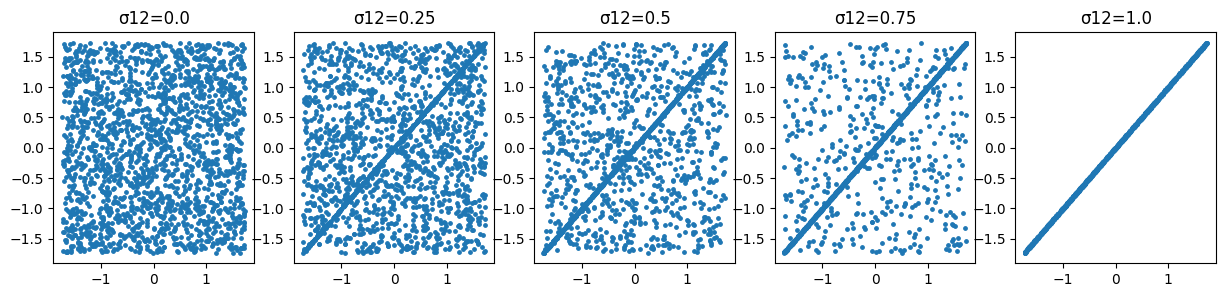

In [30]:
import matplotlib.pyplot as plt

def gen_correlated_uniforms_mixture(sigma12, n=5000):
    a, b = -np.sqrt(3), np.sqrt(3)
    p = 1 - sigma12
    X1 = np.random.uniform(a, b, size=n)
    X2 = np.random.uniform(a, b, size=n)
    B = np.random.binomial(1, p, size=n)
    V1 = X1
    V2 = (1-B)*X1 + B*X2
    return V1, V2

sigmas = [0.0, 0.25, 0.5, 0.75, 1.0]
fig, axes = plt.subplots(1,5, figsize=(15,3))
for ax, s in zip(axes, sigmas):
    V1, V2 = gen_correlated_uniforms_mixture(s, n=2000)
    ax.scatter(V1, V2, s=6)
    ax.set_title(f"σ12={s}")
plt.show()

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

In [31]:
V1, V2 = gen_correlated_uniforms_mixture(0.5)
np.mean((V1 <= 0) & (V2 <= 0))

np.float64(0.3634)

<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

$$
U_i = \Phi(Z_i) \sim \text{Uniform}(0,1) \\
[\alpha,\beta] = [-\sqrt{3},\sqrt{3}] \\
W_i = \alpha + (\beta-\alpha) U_i
$$
Thus each $W_i \sim \text{Uniform}(-\sqrt{3},\sqrt{3})$ with mean $0$ and variance $1$.

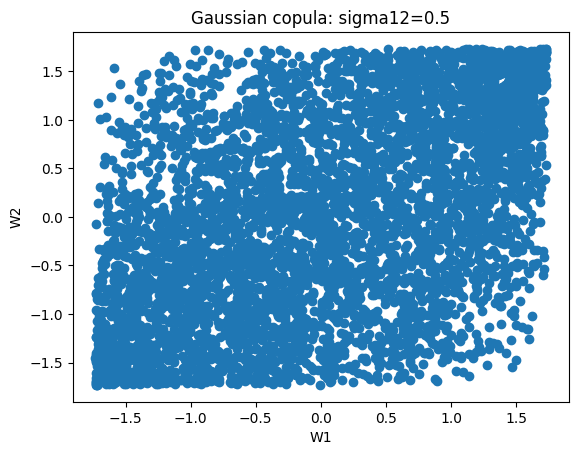

Estimated P(W1 >= 0, W2 >= 0) = 0.3286


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def gen_gaussian_copula_uniforms(sigma12, alpha=-np.sqrt(3), beta=np.sqrt(3), n=5000):
    Sigma = np.array([[1.0, sigma12],
                      [sigma12, 1.0]])
    Z = np.random.multivariate_normal(mean=[0,0], cov=Sigma, size=n)
    Z1, Z2 = Z[:,0], Z[:,1]
    W1 = alpha + (beta-alpha) * norm.cdf(Z1)
    W2 = alpha + (beta-alpha) * norm.cdf(Z2)
    return W1, W2

sigma12 = 0.5
n_samples = 5000
W1, W2 = gen_gaussian_copula_uniforms(sigma12, n=n_samples)
plt.scatter(W1, W2)
plt.title(f"Gaussian copula: sigma12={sigma12}")
plt.xlabel("W1")
plt.ylabel("W2")
plt.show()

prob = np.mean((W1 >= 0) & (W2 >= 0))
print("Estimated P(W1 >= 0, W2 >= 0) =", prob)
